<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [13]:
df.isnull().sum().sum()

0

In [14]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [16]:
df.shape

(506, 14)

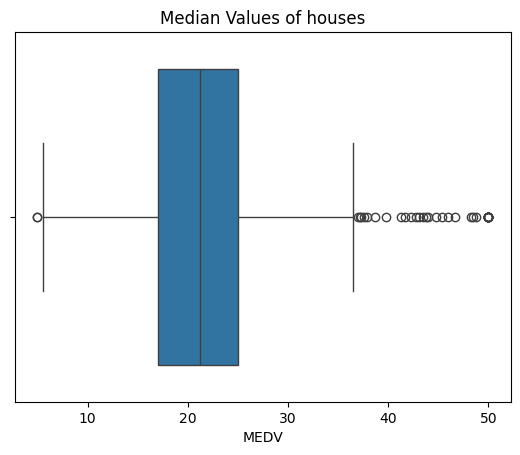

In [17]:
sns.boxplot(x='MEDV', data= df)
plt.title("Median Values of houses")
plt.show()

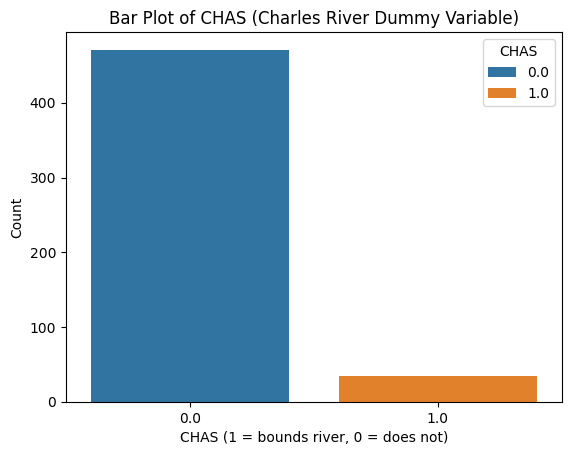

In [20]:
sns.countplot(data= df, x='CHAS' , hue='CHAS')
plt.title('Bar Plot of CHAS (Charles River Dummy Variable)')
plt.xlabel('CHAS (1 = bounds river, 0 = does not)')
plt.ylabel('Count')
plt.show()

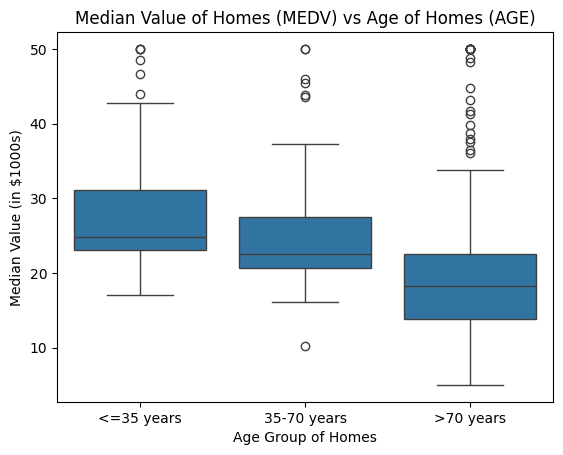

In [22]:
bins = [0, 35, 70, 100]
labels = ['<=35 years', '35-70 years', '>70 years']
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True)

# Boxplot: MEDV vs discretized AGE
sns.boxplot(data=df, x='AGE_group', y='MEDV')
plt.title('Median Value of Homes (MEDV) vs Age of Homes (AGE)')
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

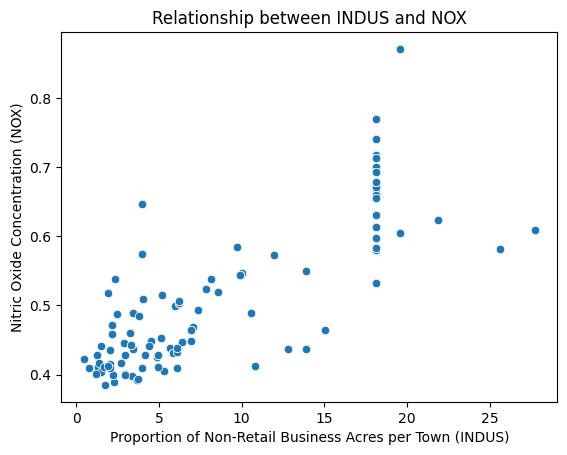

In [23]:
sns.scatterplot(data=df, x='INDUS', y='NOX')
plt.title('Relationship between INDUS and NOX')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

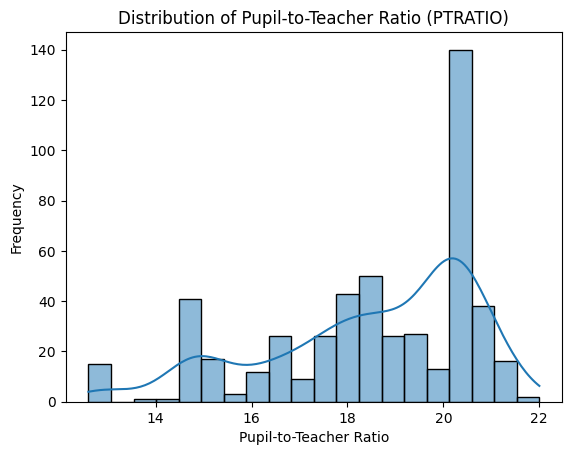

In [24]:
# Histogram of PTRATIO
sns.histplot(data=df, x='PTRATIO', bins=20, kde=True)
plt.title('Distribution of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

## 1. T-Test: Is there a significant difference in median house value based on CHAS?

### HYPHOTESIS

#### H₀ (null): There is no difference in the mean MEDV between houses that bound the river and those that do not.

#### H₁ (alt): There is a significant difference in the mean MEDV between the two groups.

In [26]:
from scipy.stats import ttest_ind
# Split data based on CHAS
medv_river = df[df['CHAS'] == 1]['MEDV']
medv_no_river = df[df['CHAS'] == 0]['MEDV']

# T-test
t_stat, p_value = ttest_ind(medv_river, medv_no_river, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: 3.113, p-value: 0.004


#### p-value is less than 0.005 . Therefore reject the hypothesis


## 2. ANOVA: Is there a difference in MEDV across AGE groups?

#### Hypotheses:
#### H₀: All AGE groups have the same mean MEDV.
#### H₁: At least one AGE group has a different mean MEDV.

In [28]:
from scipy.stats import f_oneway

# Discretize AGE into 3 groups
bins = [0, 35, 70, 100]
labels = ['<=35 years', '35-70 years', '>70 years']
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Perform ANOVA
group1 = df[df['AGE_group'] == '<=35 years']['MEDV']
group2 = df[df['AGE_group'] == '35-70 years']['MEDV']
group3 = df[df['AGE_group'] == '>70 years']['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

F-statistic: 36.408, p-value: 0.000


#### p-value < 0.05 therefore we reject the null hypothesis

## 3. Pearson Correlation: Is there a relationship between NOX and INDUS?

#### Hypotheses:

#### H₀: There is no linear correlation between NOX and INDUS (ρ = 0).

#### H₁: There is a linear correlation (ρ ≠ 0).

In [29]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['NOX'], df['INDUS'])
print(f"Correlation coefficient: {corr_coef:.3f}, p-value: {p_value:.3f}")

Correlation coefficient: 0.764, p-value: 0.000


#### If p-value < 0.05, reject H₀ → There is a significant linear relationship.Otherwise we fail to reject H₀.
#### our p-vqalue is than 0.05 , Hence there IS a signicant correlation between NOX and INDUS

## 4. Regression: Impact of distance (DIS) on MEDV

#### Hypotheses:
#### H₀: The slope of DIS is zero (no effect on MEDV).
#### H₁: The slope of DIS is not zero (there is an effect).

In [30]:
import statsmodels.api as sm

# Regression: MEDV ~ DIS
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.21e-08
Time:                        16:47:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Since p < 0.05, we reject the null hypothesis.
#### There is a statistically significant positive relationship between DIS and MEDV